#  GIT

---

## 00 - INTRODUZIONE

#### WHAT IS GIT
Git is a distributed version control system (VCS) used to track changes in files, typically for software development. It allows multiple people to collaborate on a project while keeping a history of modifications. We use git through the shell.
Utilities:
* Version Control: Keeps track of changes and allows you to revert to previous versions.
* Collaboration: Enables multiple developers to work on the same project without conflicts.
* Branching & Merging: Lets you work on new features without affecting the main code until it's ready.
* Backup & History: Your code and its history are stored safely.

#### WHAT IS GITHUB
GitHub is a web-based platform for version control and collaboration, built around Git. It allows developers to store, manage, and share their code efficiently thanks to cloud Storage.

#### LOCAL COPY, STAGING, LOCAL REPO, REMOTE REPO
In Git, changes go through different stages before being permanently stored in a remote repository. Here's how it works:
1. *Working Directory* (Local Copy): this is where you make changes to your files, in your local folder of your local PC.
2. *Staging Area* (Index): this is an intermediate area where you prepare changes before committing. You add files to the staging area using: `git add <file>`. For example: After modifying *file.py*, you run *git add file.py*. Now, it's staged but not yet committed.
3. *Local Repository*: when you commit, changes move from the staging area to your local repository. Commits are stored locally with a unique ID (hash). For example: `git commit -m "Now I havr updated file.py`. Now, file.py is saved in the local Git history.
4. *Remote Repository* (GitHub): your local commits stay on your machine until you push them to a remote server with `git push origin <branch>`. The remote repository allows others to access and collaborate on your code.

Files in your Git repository folder can be in one of 2 states: *tracked*, i.e. files that Git knows about and are added to the repository; *untracked*, i.e. files that are in your working directory, but not added to the repository.

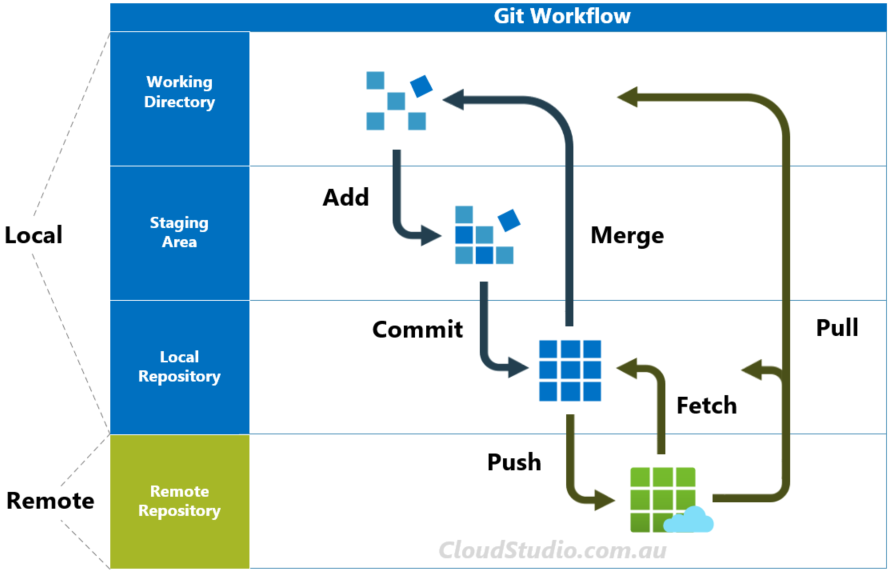

In [4]:
from IPython.display import Image, display
display(Image("./images/git_schematic.png", width=800))

#### CREATING A REPO
We can have a Git repository through `git init`: in this way the folder we are in will become a Git repository. A **.git** file will be created inside, that will track all tha chenges to existing files, new files, eliminated files etc.  
Similarly with `git clone <url>` we can clone a remote github repository in our local folder. Our folder and the github repository will be connected, and we will be able to push and pull files.

#### CONFIGURATION
Each local repository will have a local configuration that will contain our identity: username and email. Similarly we will have a global configuration.  
With can use:
* `git config --local user.name "Tuo Nome"`: to set the local username
* `git config --local user.email "tua.email@example.com"`: to set the local email
* `git config --list`: to see the actual configuration
Similarly we have a global default configuration al `gloabl` instead of `local`.

#### STATUS AND CRONOLOGY
* `git status`: mostra lo stato dei file (modificati, tracciati, non tracciati)
* `git log` : mostra la cronologia dei commit
* `git log --oneline --graph --all`: visualizza i commit in modo compatto e grafico

You can always find more info on a command typing `git <command> help`.

---

## 01 - DEAL WITH FILES

#### TO UPLOAD CHANGES
1. `git add <file>`: aggiunge un file alla staging area
    * `git add . `: aggiunge tutti i file modificati alla staging area
2. `git commit -m "Messaggio"`: salva i cambiamenti con un messaggio descrittivo
    * `git commit --amend -m "Nuovo Messaggio"`: modifica l'ultimo commit
    * `git commit -m -a "Messaggio"`: con '-a' saltiamo la fase di 'add'
3. `git push origin <branch>`: carica i commit su un repository remoto

NOTE: Staged files are files that are ready to be committed to the repository you are working on.  
NOTE: when committing, Git will take a snapshot (=copy) of the state of your repo, so in the future you can always return to each commit state. 

#### TO DOWNLOAD CHANGES
* `git pull origin <branch>`: scarica e unisce le modifiche dal repository remoto
* `git fetch`: scarica i cambiamenti dal repository remoto senza unirli

#### BRANCHING AND MERGING
* `git branch`: mostra i branch esistenti
* `git branch <nome-branch>`: crea un nuovo branch
* `git checkout <nome-branch>` o `git switch <nome-branch>`: passa a un branch esistente
* `git merge <nome-branch>`: unisce il branch specificato nel branch attuale

#### DEAL WITH MODIFICATIONS
* `git reset <nome-file>`: rimuove un file dalla staging area
* `git reset --hard <commit>`: torna a un commit precedente, cancellando le modifiche successive
* `git revert <commit>`: crea un commit che annulla un commit precedente
* `git stash`: salva temporaneamente le modifiche senza fare un commit
* `git stash pop`: recupera le modifiche salvate in stash